In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

# Introduction
Hello everyone,  
we are four friends called Alice, Bob, Charlie and Debby talking about our experiences to apply for a loan to build our dream-home from the world-renowned Banksey-Bank. All of us have the expectation, that everyone with a high income could receive a loan. Since Alice and Charlie both are earning 100k+, they are labeled as high-income-earners. But, before talking about money, let us introduce ourselfs:

Alice:   
Hi, my name is Alice, I am 67 years old, a mother of 3 wonderful children and the wife of a lovely husband. I am the founder of a successful medtech-startup with a master-of-desaster degree in communication-sciences and have an income of about 180k.

Bob:  
My name is Bob the builder, a well educated engineer with a doctoral degree (but I don't like to brag about it) and I am literally a one-man-show with his own tv-format as well. I am single and I enjoy my life to the fullest drinking beer, driving my v8 Chevy and blowing my yearly income of about 95k, since I can not take a dollar into the graveyard.

Charlie:   
My name is Charles, but my friends call me Charlie. You can call me Charles. I am a banker at the currently struggeling Credit-Suisse Bank. I make more money than Bob, 115k to be specific, while working less and I am proud about it. I like to spend my time off with some friends playing billard at the local pub.

Debby:  
"Be your own artist and always be confident in what you're doing. If you're not going to be confident, you might as well not be doing it." This is my most favourite quote from Aretha Franklin and I love it. Oh, by the way, my name is Debby and I am very passionate musician playing the guitar in 3 different bands from Blues over Pop to Rock. I spend many hours practicing the perfect guitar licks and riffs and doing 6 shows a week in different bars. Nevertheless, artists like myself are not very well paid, so my yearly income is around 50k. I am totally okay with this, since I can follow my passion, which is the greatest good in life.

The Banksey-Bank is very well known to be using cutting-edge technology before any other of their competitors. Right now, the Banksey-Bank uses a sophisticated, almighty and buzzwordy machine-learning model to determine the loan-worthiness of it's applicant based on a relatively small set of information about each individual. These informations are the following:

a) The variable ID does not add any particular information.
b) There are 2 nominal variables:

    1.ID    
    2.Zip Code
    
c) There are 2 Ordinal Categorical Variables:

    1.Family - Family size of the customer    
    2.Education - education level of the customer
    
d) There are 5 independent variables:

    1.Age:Age of the customer
    2.Experience:Years of experience of the customer
    3.Income:Annual income in dollars
    4.CCAvg:Average credit card spending
    5.Mortage:Value of House Mortgage
    
e) There are 5 binary category variables:

    1.Personal Loan:Does this customer receive a loan from the Banksey-Bank?
    2.Securities Account:Does the customer have a securities account with the bank?
    3.CD Account:Does the customer have a certificate of deposit (CD) account with the bank?
    4.Online:Does the customer use internet banking facilities?
    5.Credit Card:Does the customer use a credit card issued by Banksey-Bank?

f) And the Target variable is: Personal Loan

# Data preparation
Hey, this is some top secret area of the Banksey-Bank. Nobody has the right to check the dataset, which has been used to train the machine-learning model. Skip this section!

In [2]:
# read data
my_data = pd.read_csv('./data/Bank_Personal_Loan_Modelling.csv')
my_data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","Personal_Loan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [3]:
# Cleaning the negative values 
my_dataExp = my_data.loc[my_data['Experience'] >0]
negExp = my_data.Experience < 0
column_name = 'Experience'
my_data_list = my_data.loc[negExp]['ID'].tolist()

for id in my_data_list:
    age = my_data.loc[np.where(my_data['ID']==id)]["Age"].tolist()[0]
    education = my_data.loc[np.where(my_data['ID']==id)]["Education"].tolist()[0]
    df_filtered = my_dataExp[(my_dataExp.Age == age) & (my_dataExp.Education == education)]
    exp = df_filtered['Experience'].median()
    my_data.loc[my_data.loc[np.where(my_data['ID']==id)].index, 'Experience'] = exp
    
#The records with the ID, get the values of Age and Education columns.
#Then apply filter for the records matching the criteria from the dataframe 
#which has records with positive experience and take the median.
#Apply the median again to the location(records) which had negative experience.   

In [4]:
my_data.dropna(inplace=True)
my_data.drop(columns=['ID'], inplace=True)
# my_data.dropna().isna().sum()

In [5]:
# Filter one outlier in ZIPCode to make plots look nicer
my_data = my_data[(my_data['ZIPCode'] > (my_data['ZIPCode'].mean() - 3*my_data['ZIPCode'].std())) &
                  (my_data['ZIPCode'] < (my_data['ZIPCode'].mean() + 3*my_data['ZIPCode'].std()))]

# Sophisticated AI and buzzwordy machine-learning model
Hey, this is some top secret area of the Banksey-Bank. Nobody has the right to check the model, which is currently in use. Skip this section!

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# independent variables
X = my_data.drop(columns='Personal_Loan')
# dependent variable
y = my_data['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # To set the random state

# add candidates to be observed
if (True):
    # features: Age Experience Income ZIPCode Family CCAvg Education Mortgage SecuritiesAccount CDAccount Online CreditCard
    # Alice approved
    X_test = X_test.append(pd.DataFrame(data=[np.array([67, 42, 180, 93437, 4, 6, 4, 350, 1,1,1,1])], columns=X_test.columns, index=[6000]))
    y_test = y_test.append(pd.Series(data=[1], index=[6000]))

    # Bob approved
    X_test = X_test.append(pd.DataFrame(data=[np.array([55, 35, 95, 93437, 1, 10, 4, 200, 1,1,1,1])], columns=X_test.columns, index=[6001]))
    y_test = y_test.append(pd.Series(data=[0], index=[6001]))Banksey-Bank

    # Charlie not approved
    X_test = X_test.append(pd.DataFrame(data=[np.array([50, 30, 115, 93437, 1, 1, 1, 600, 1,1,1,1])], columns=X_test.columns, index=[6002]))
    y_test = y_test.append(pd.Series(data=[1], index=[6002]))

    # Debby not approved
    X_test = X_test.append(pd.DataFrame(data=[np.array([25, 5, 50, 93437, 1, 0, 1, 150, 1,1,1,1])], columns=X_test.columns, index=[6003]))
    y_test = y_test.append(pd.Series(data=[0], index=[6003]))

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Check the loan-requests
Alice, Bob, Charlie and Debby are currently in the Banksey-Bank to apply for a loan to build their dream-houses. Let's check, what the Banksey-Bank-Clerk and his machine-learning model are thinking about the applicants:

In [7]:
print("Loan application status: (0 = Loan not approved, 1 = Loan approved)")
print("Alice: {}".format(model.predict(X_test.iloc[-4].to_numpy().reshape(1, -1))[0]))
print("Bob: {}".format(model.predict(X_test.iloc[-3].to_numpy().reshape(1, -1))[0]))
print("Charlie: {}".format(model.predict(X_test.iloc[-2].to_numpy().reshape(1, -1))[0]))
print("Debby: {}\n".format(model.predict(X_test.iloc[-1].to_numpy().reshape(1, -1))[0]))

Loan application status: (0 = Loan not approved, 1 = Loan approved)
Alice: 1
Bob: 1
Charlie: 0
Debby: 0



/home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Of course, Alice and Bob are very happy with the result, since their loan-application has been approved. Charlie is angry, since he thinks the loan-approval-decision should be based on the income and he earns a whole lot more money (115k) than Bob (95k), so the machine-learning model has to be wrong from his point of view. Debby on the other hand was getting very quiet as everyone told her, that it will be incredible difficult to get a loan for a house with her financial situation. Poor Debby...

# Why did Charlie not get a loan-approval?
Charlie is getting louder and louder, but the Banksey-Bank-Clerk is staying calm. He is well prepared and he has got his tools ready to analyze the machine-learning-model-decision. First, he wants to show Charlie which features lead to the actual decision on behalf of a LIME plot. This plot shows the contribution of the features, which led to the actual decision in a positive or a negative way with it's magnitude. This helps to get an idea at first. (Select 2 for Charlie)

In [8]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from interpret import show
from interpret.blackbox import LimeTabular


lime = LimeTabular(predict_fn=model.predict_proba, data=X_test)
lime_local = lime.explain_local(X_test.loc[[6000, 6001, 6002, 6003]], y_test.loc[[6000, 6001, 6002, 6003]])
show(lime_local)

/home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fit

In [9]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model,
                                X_test,
                                y_test,
                                n_repeats=10,
                                random_state=42)

perm_sorted_idx = result.importances_mean.argsort()

Checking minimal importance. Should be greater or close to zero:

In [10]:
result.importances_mean.min()

-0.0022044088176352505

Minimal feature importance looks fine! So we should not have an overfitted model.

Let's try to identify the most important features, which are most relevant for the model:

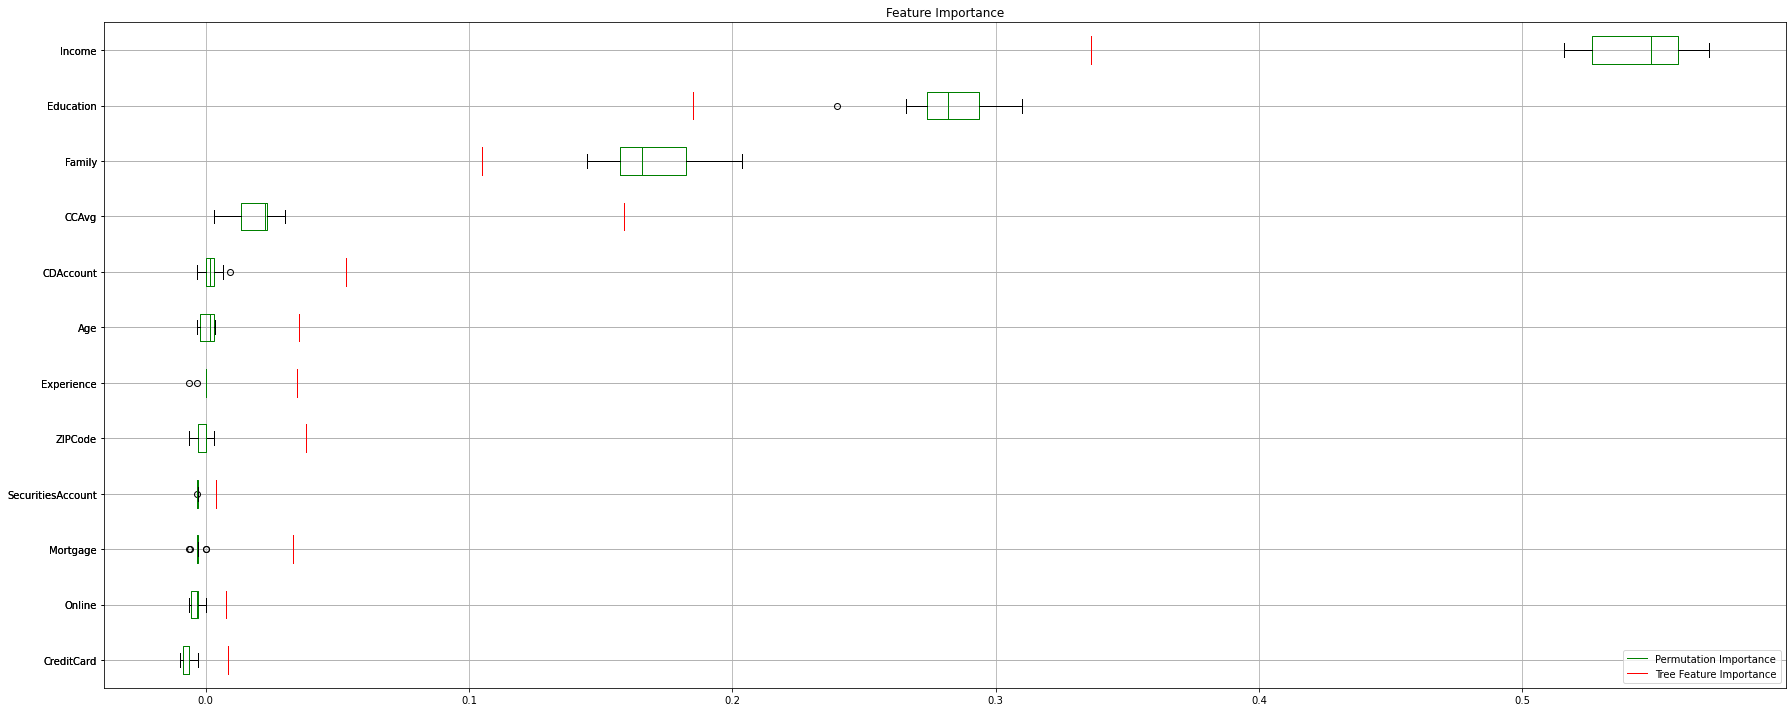

In [11]:
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1,1,figsize=(25,10))
ax1.title.set_text('Feature Importance')

bp1 = ax1.boxplot((result.importances/result.importances.sum(axis=0))[perm_sorted_idx].T,
            vert=False,
            labels=X_test.columns[perm_sorted_idx],
            medianprops=dict(color='g'),
            boxprops=dict(color='g'))

bp2 = ax1.boxplot(model.feature_importances_[perm_sorted_idx,np.newaxis].T,
            vert=False,
            labels=X_test.columns[perm_sorted_idx],
            medianprops=dict(color='r'),
            boxprops=dict(color='r'))

ax1.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Permutation Importance', 'Tree Feature Importance'], loc='lower right')
fig.tight_layout()
plt.grid()
plt.show()

The permutation- and tree-feature-importance plot reveals the features Income, Education, Famliy and CCAvg as the most important ones with the highest influence on the decision over the full range of possible values!

Let's check for the direction of the feature-contributions, since we want to know, if an increase in a feature value will increase or decrease the probability to obtain a loan. In the following summary-plot we can observe, that for the 5 most important features "Income", "Education", "CCAvg", "Family", "CDAccount" and "Mortgage" a higher feature values results in a higher probability to obtain a loan! E.g. for the CreditCard feature, the direction of change changes.

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


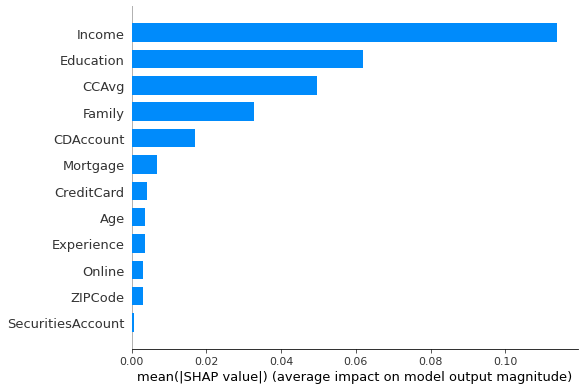

In [12]:
import shap
shap.initjs()

idx = -2 # Charlie is the second to last individual
candidate = X_test.reset_index(drop=True).iloc[idx]
candidate_pred = model.predict_proba(candidate.to_numpy().reshape(1, -1))

# compute shap-values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns, plot_type="bar")

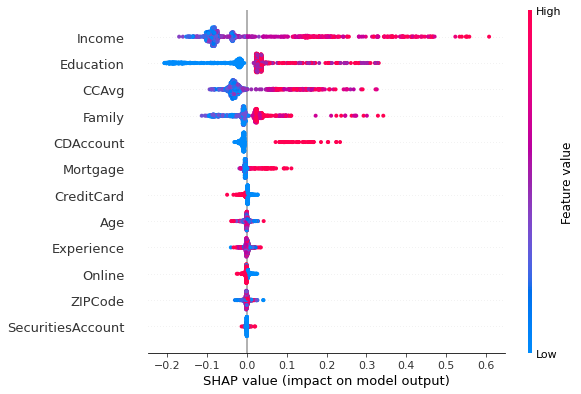

In [13]:
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)

The partial dependence plots reveal, that a change of the value of a feature does not always result in a proportional change in the outcome. E.g. There is nearly no change between similiar individuals, when they have an income between 0 and 80k. The same behaviour can be observed in the range from 140k+. But in between 80k and 140k a slight change of the income could increase the possibility to obtain a loan dramatically. Similar behavour can be observed with the other three most important features.

Advices from these average plots:  
Charlie could negotiate his compensation with his teamleader a bit or he could deliever pizzas for Dieci along his daily job as well to get a higher score. Charlie could also take a course about an interesting topic to boost his score. Having a large family or a large average spending with his credit card would increase his score. One funny advise from the Banksey-Bank-Clerk could be to use his credit-card to buy flowers and other nice things for his girlfriend and eventually the family would grow naturally ;)

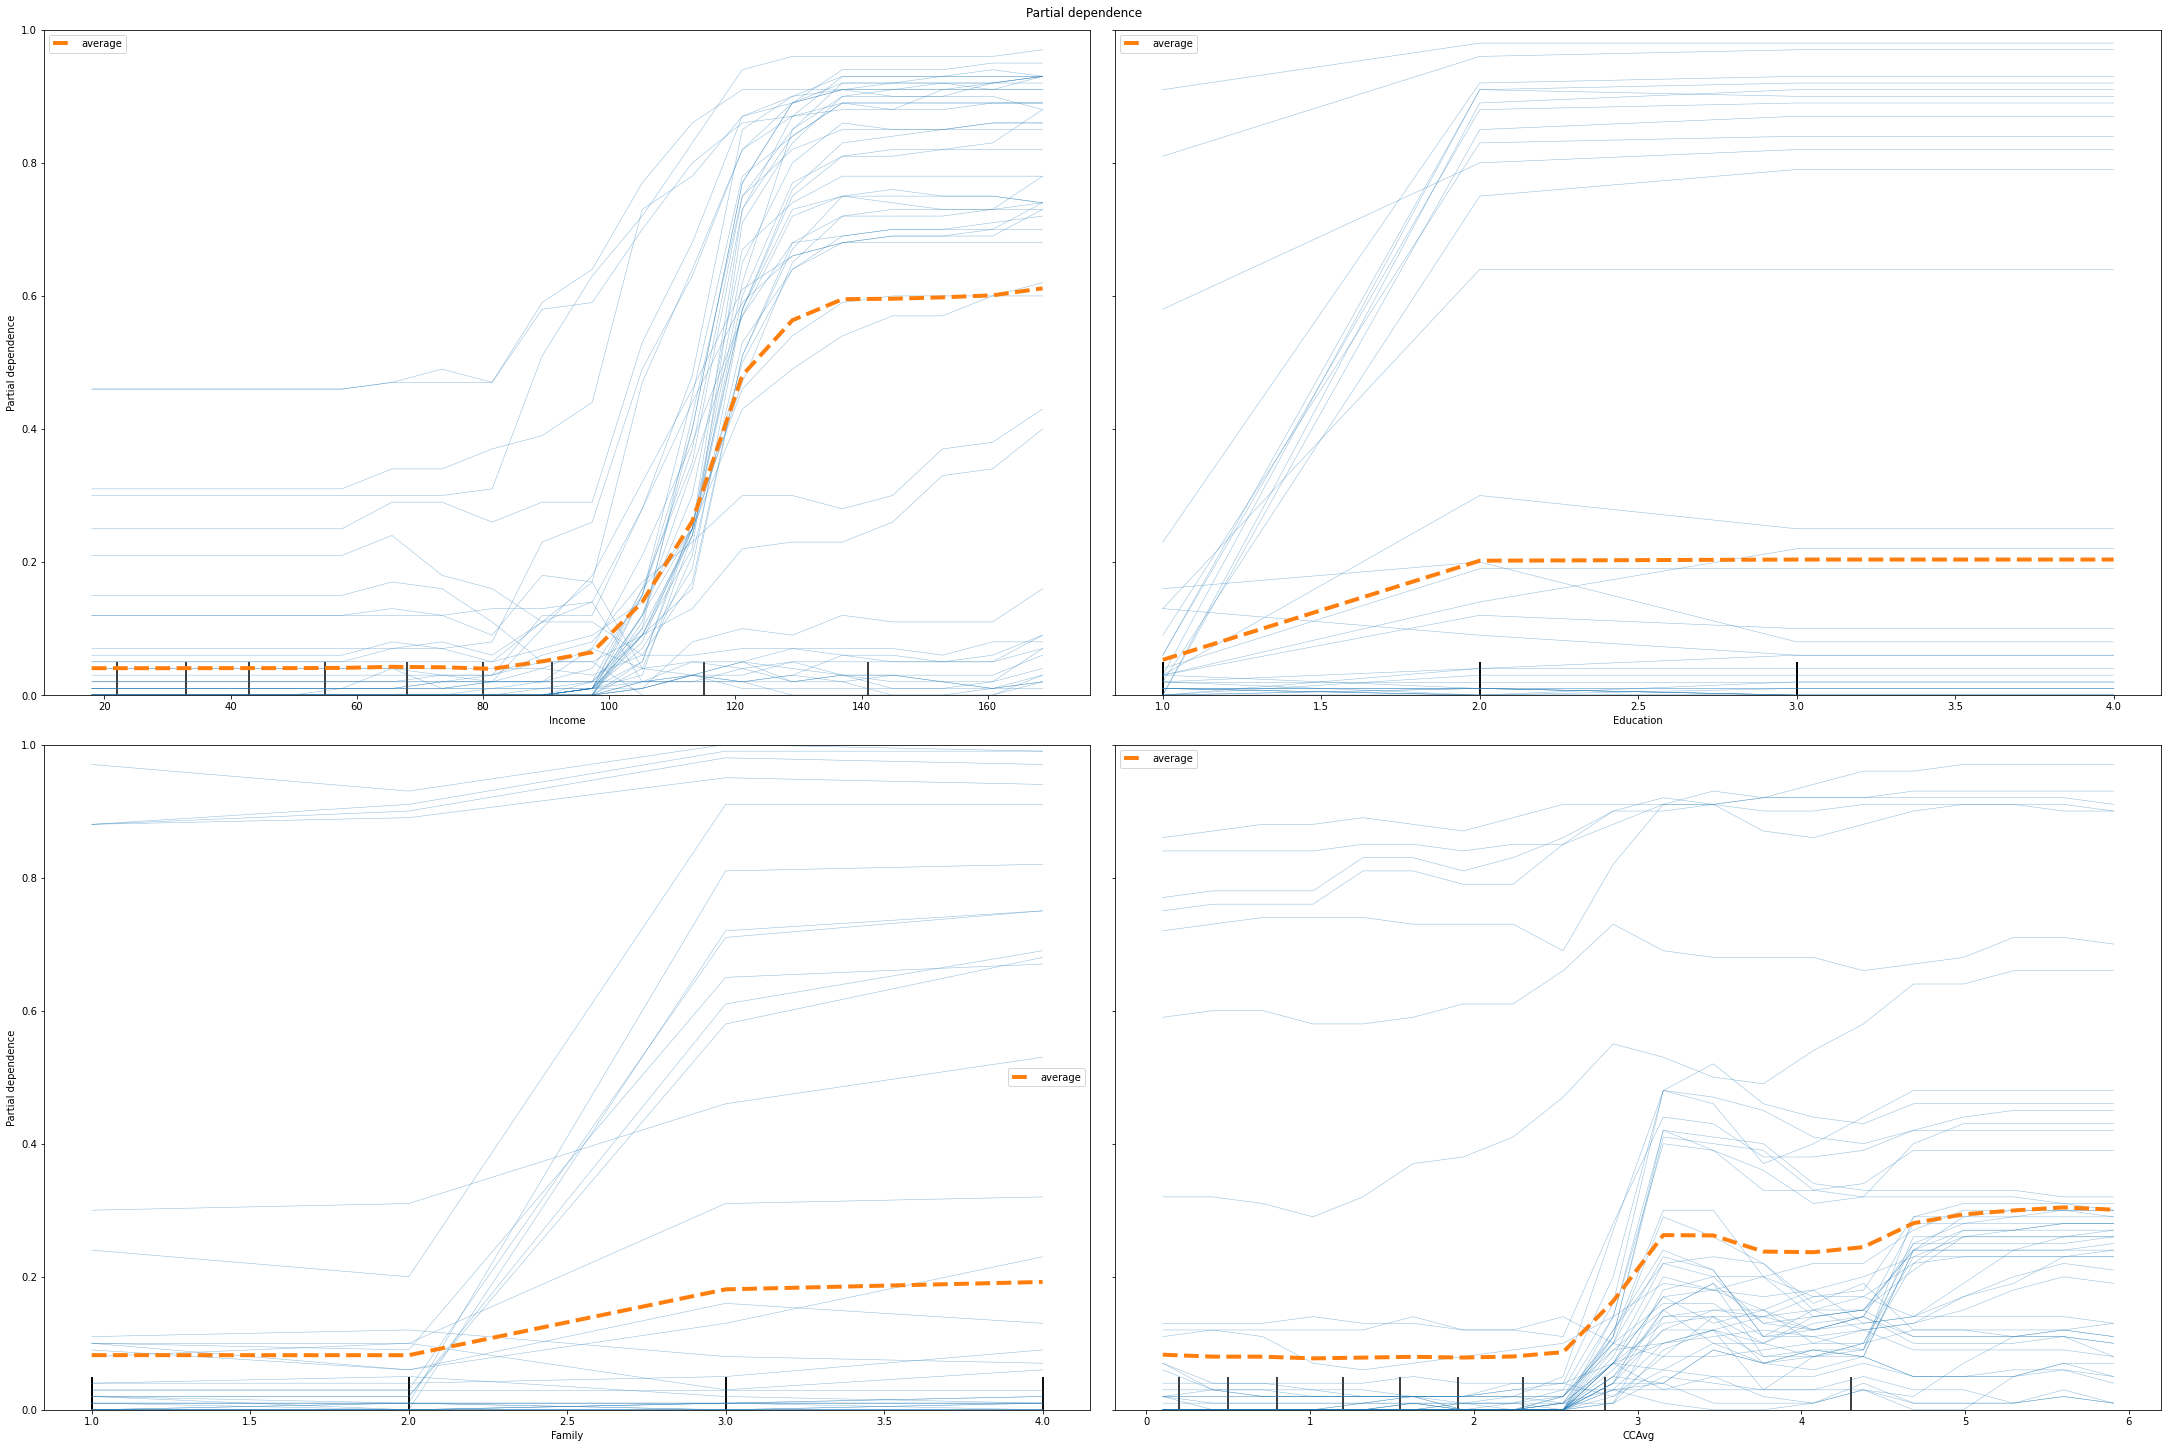

In [14]:
# partial dependence plot
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(2,2,figsize=(30,20), constrained_layout=True)
PartialDependenceDisplay.from_estimator(model,
                                        X_test,
                                        ['Income', 'Education', 'Family', 'CCAvg'],
                                        feature_names=X_test.columns,
                                        target=2,
                                        kind='both',
                                        subsample=50,
                                        n_jobs=-1,
                                        grid_resolution=20,
                                        ax=ax,
                                        random_state=42,
                                        ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
                                        pd_line_kw={"color": "tab:orange", "linestyle": "--", "linewidth": 4})
fig.suptitle('Partial dependence')
plt.show()

The following partial-dependece plots give concrete advice how Charlie could improve his score. As we learnt, the machine-learning model is simple regarding the most important features: "The more, the better" describes the behaviour the best. How much Charlie's score would improve (Given his income=115k, Education=1, CCAvg=1), when changing one feature only can be read from the following plots:

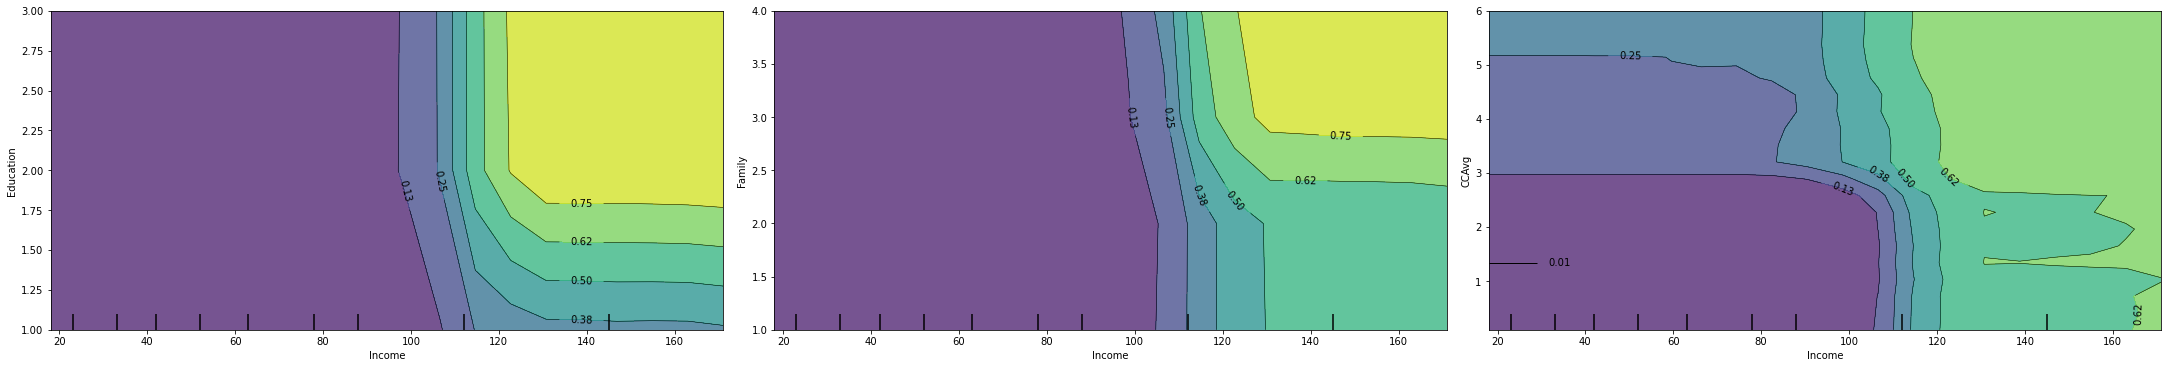

In [15]:
fig, ax = plt.subplots(1,3,figsize=(30,5), constrained_layout=True)
PartialDependenceDisplay.from_estimator(model,
                                        X_train,
                                        [('Income','Education'), ('Income', 'Family'), ('Income', 'CCAvg')],
                                        feature_names=X_test.columns,
                                        n_jobs=-1,
                                        grid_resolution=20,
                                        ax=ax)
plt.show()

In [16]:
from itertools import product

# Display all combinations of a given number of most important features
if (False):
    n_important_features = 4
    most_important_features = X_test.columns[np.argsort(np.abs(shap_values[1]).mean(0))][::-1][:n_important_features]
    print("Most Important Features:", list(most_important_features))

    for (feature, interaction) in product(most_important_features, most_important_features):
        if feature is interaction:
            shap.dependence_plot(feature, shap_values[1], X_test)
        else:
            shap.dependence_plot(feature, shap_values[1], X_test, interaction_index=interaction)

The next plot explains the model and it's interaction term between the features "Income" and "Education". In the fine arts industry are many very well trained and skilled artists like musicians, painters, sculptures and so on. Sad, but mostly true, they do not earn as much as they deserve and this plot shows their bad position for a loan in the lower left corner. Other low- to medium-income workers typically have a more secure and stable job and are therefore a lower risk for the Banksey-Bank. For the high-income section on the other hand, the income alone has a positive influence on their score. If they additionally have a high educational degree, the positive influence on their score boosts even more.

This means for Charlie, that a higher degree of education could potentially boost his possibility to obtain a loan.

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


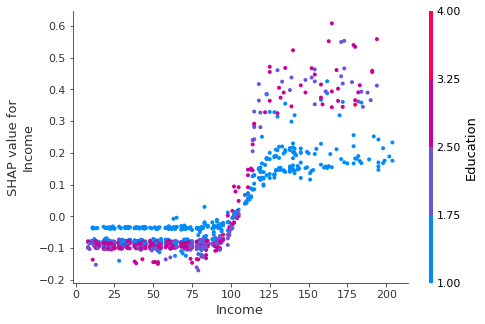

In [17]:
shap.dependence_plot('Income', shap_values[1], X_test, interaction_index='Education')

Low- to medium income workers, which are single, typically have low expenses. If they have a large family, they still have a low- to medium income, but huge expenses, which is a huge risk for a loan-lender, so the score typically goes down. For high-income earners, the situation changes. High-income earners have significantly better chances to obtain a loan. If they have a large family, their score increases even more. The idea behind this could be, that single individuals go out a lot, spend a lot of money on useless things and have a generally more lasvish live than a mother or father of a large family. In this sense, members of large families typically have a less lavish lifestyle and hence a lower risk to default.

Advise from the Banksey-Bank-Clerk for Charlie:  
If Charlie wants to buy a house because he and his girlfriend are planning to have kids, then he applied for a loan just too early. With the current model, he should found a family with his girlfriend/wife first and apply for a loan afterwards.

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


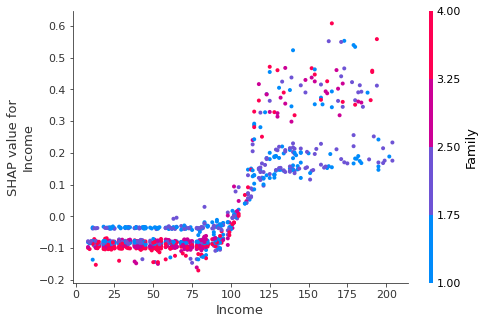

In [18]:
shap.dependence_plot('Income', shap_values[1], X_test, interaction_index='Family')

Banksey-Bank-Clerk to Charlie:  
When we look at the factors (Given by the following force-plot), which are working against you, we can identify the features "Education" and "Family". My advise to you is to either take a course about an interesting topic, which could also leverage your fun at work and your income, or you build your dream-house not before you've got your family, but after you can prove to the Bank, that you really have a family. What do you prefer? Taking an intersting course or having childrens first?

In [19]:
# works fine to plot for one dynamic candidate
shap.force_plot(explainer.expected_value[1],
                shap_values[1][idx],
                candidate)

Charlie to the Bank-Clerk:  
One day I want to have a family and a house for all of us with a nice, small garden to enjoy some quality-time together. But I think, this will not take place in the next 3-5 years. But I heard about an intersting master-studies at the Fachhochschule Ost, which I have been always interested in. So I think I will take this course to enhance my knowledge and improve my score for a loan at the same time. Can you guarantee, that this will work?

Banksey-Bank-Clerk:  
Just take a look the our awesome machine-learning model, we can test your future profile immediately. We just have to update your education-class from 1 to 2 and run the model again:

In [20]:
# manipulate candidate
tmp = candidate
tmp['Education'] = 2
X_test_update = X_test.copy()
X_test_update.iloc[idx] = tmp
X_test_update

# compute shap-values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_update)

# works fine to plot whole test-set
# shap.force_plot(explainer.expected_value[0],
#                 shap_values[0],
#                 X_test_update)

# works fine to plot for one fixed candidate
# shap.force_plot(explainer.expected_value[0],
#                 shap_values[0][0],
#                 candidate)

# works fine to plot for one dynamic candidate
shap.force_plot(explainer.expected_value[1],
                shap_values[1][idx],
                candidate)

In [21]:
print("Loan application status: (0 = Loan not approved, 1 = Loan approved)")
print("Updated loan-prediction for Charlie after his master studies: {}".format(model.predict(candidate.to_numpy().reshape(1,-1))[0]))

Loan application status: (0 = Loan not approved, 1 = Loan approved)
Updated loan-prediction for Charlie after his master studies: 1


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Charlie to the Banksey-Bank-Clerk:  
This is awesome, thanks man!

# Debug model
After the Banksey-Bank-Clerk has successfully negotiated 3 loans, he wanted to check the latest internal machine-learning model on behalf of an IT-collegue. But how could one get insights, if a model works as it should? How could potential problems be detected? First, check the probabilites of the output of the model for some customers and check, if they make sense. (Not being 0% or 100% all the time, this could indicate an error)

In [22]:
print("Alice receives his loan: {}%".format(model.predict_proba(X_test.iloc[-4].to_numpy().reshape(1, -1))[0][1]*100))
print("Bob receives her loan: {}%".format(model.predict_proba(X_test.iloc[-3].to_numpy().reshape(1, -1))[0][1]*100))
print("Charlie receives his loan: {}%".format(model.predict_proba(X_test.iloc[-2].to_numpy().reshape(1, -1))[0][1]*100))
print("Debby receives his loan: {}%".format(model.predict_proba(X_test.iloc[-1].to_numpy().reshape(1, -1))[0][1]*100))

Alice receives his loan: 91.0%
Bob receives her loan: 51.0%
Charlie receives his loan: 22.0%
Debby receives his loan: 3.0%


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Second, check the train- and test-score to determine, if there is a bias and/or variance problem:

In [23]:
print("Scores of the zero bias and low variance model:")
print("Train-score: {}%".format((model.score(X_train, y_train)*100).round(1)))
print("Test-score: {}%".format((model.score(X_test, y_test)*100).round(1)))

Scores of the zero bias and low variance model:
Train-score: 100.0%
Test-score: 98.3%


In [24]:
from sklearn import metrics

print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       906
           1       0.93      0.88      0.91        92

    accuracy                           0.98       998
   macro avg       0.96      0.94      0.95       998
weighted avg       0.98      0.98      0.98       998



No bias and no variance problem detected. So far, so good. The model can learn the hidden structure in the training-dataset very well and the test-set has a very good score as well. This means, if the dataset does a good job in representing the reality, then the model should work fine in practice.

Let's check, if we have a balanced dataset to train our model: (On behalf of a histogram or a correlation matrix)

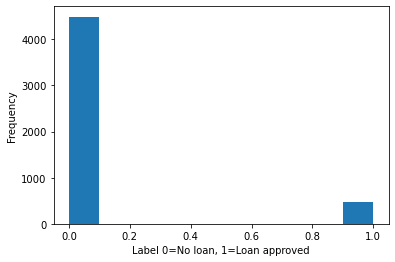

In [25]:
plt.hist(my_data['Personal_Loan'])
plt.xlabel("Label 0=No loan, 1=Loan approved")
plt.ylabel("Frequency")
plt.show()

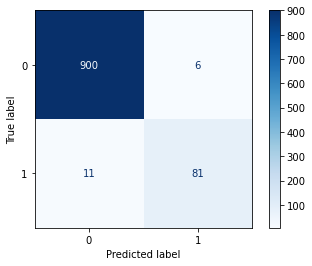

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

# indicates an unbalanced dataset
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.show()

Oh no, we have a really unbalanced dataset! This is a major problem, which needs to be addressed. Some strategies would be:  
- Collect more data from own customers.
- Buy anonymous data from other Banks.
- Upsample the minority class
- etc.

Next, check the dataset for correlated features: (On behalf of a pairplot and a correlation-matrix)

In [27]:
numerical_features = ['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']
categorical_features = ['SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard', 'Family', 'Education']

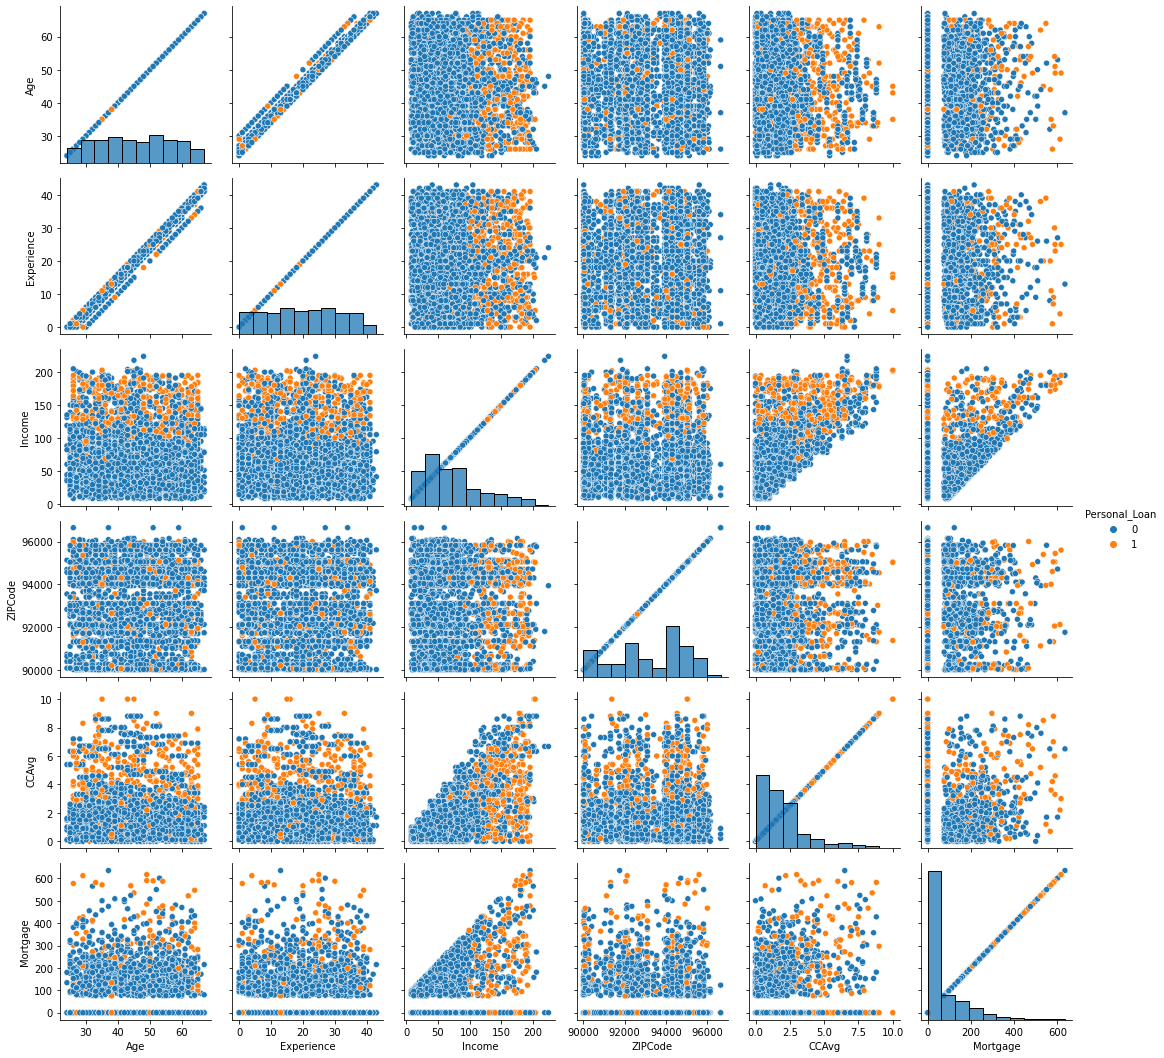

In [28]:
g = sns.PairGrid(data=pd.concat([X_train, y_train], axis=1), vars=numerical_features, hue='Personal_Loan')
g.map(sns.scatterplot)
# g.map_upper(sns.kdeplot, hue=None)
g.map_diag(sns.histplot, hue=None, bins=10)
g.add_legend()
plt.show()

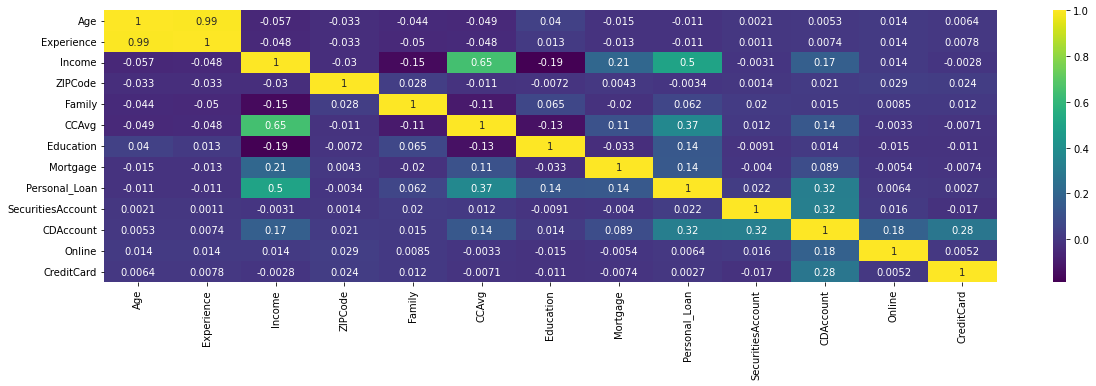

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))
sns.heatmap(my_data.corr(), annot=True, ax=ax, cmap='viridis')
plt.show()

Analize the properties of the dataset:

In [30]:
my_data.describe()

Age   Experience       Income       ZIPCode       Family  \
count  4970.000000  4970.000000  4970.000000   4970.000000  4970.000000   
mean     45.464185    20.242254    73.802817  93171.433400     2.393964   
std      11.375956    11.360132    46.061800   1760.167361     1.148171   
min      24.000000     0.000000     8.000000  90005.000000     1.000000   
25%      35.000000    10.000000    39.000000  91941.000000     1.000000   
50%      45.000000    20.000000    64.000000  93448.500000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal_Loan  \
count  4970.000000  4970.000000  4970.000000    4970.000000   
mean      1.935243     1.881288    56.618310       0.096579   
std       1.744442     0.840220   101.808705       0.295414   
min       0.000000     1.000000     0.000000       0.000000   
25%       0.700000     1.000000     0.000000       0.000000   
50%       1.500000     2.000000     0.000000       0.000000   
75%       2.500000     3.000000   101.000000       0.000000   
max      10.000000     3.000000   635.000000       1.000000   

       SecuritiesAccount    CDAccount       Online   CreditCard  
count        4970.000000  4970.000000  4970.000000  4970.000000  
mean            0.104024     0.060765     0.596579     0.294165  
std             0.305323     0.238922     0.490633     0.455712  
min             0.000000     0.000000     0.000000     0.000000  
25%             0.000000     0.000000     0.000000     0.000000  
50%             0.000000     0.000000     1.000000     0.000000  
75%             0.000000     0.000000     1.000000     1.000000  
max             1.000000     1.000000     1.000000     1.000000

The two features "Age" and "Experience" are highly correlated. One should drop or even better merge those two features in a clever way.

If the categorical feature "CDAccount" is set to 1, the probability to obtain a personal loan is larger compared to the situation, when the "CDAccount" Flag is set to 0.

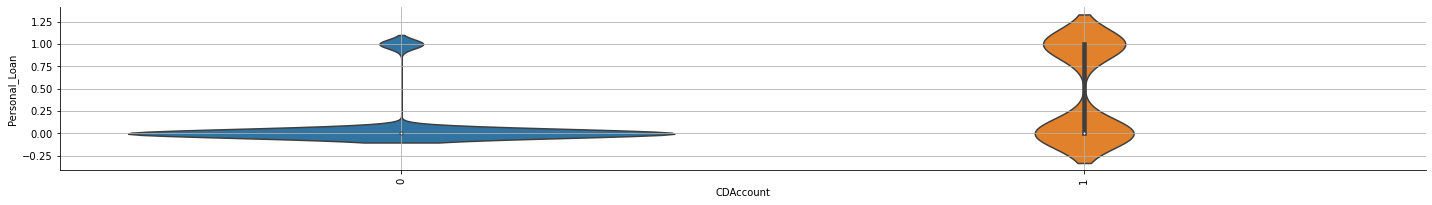

In [31]:
# Display all categorical features
# for f in categorical_features:
#     sns.catplot(data=pd.concat([X_train, y_train], axis=1), x=f, y='Personal_Loan', kind='violin', height=3, aspect=20/3)
#     plt.xticks(rotation=90)
#     plt.grid()
#     plt.show()
    
sns.catplot(data=pd.concat([X_train, y_train], axis=1), x='CDAccount', y='Personal_Loan', kind='violin', height=3, aspect=20/3)
plt.xticks(rotation=90)
plt.grid()
plt.show()

The Banksey-Bank-Clerk and his IT-collegue detected some potential problems with the machine-learning model in use and got a raise after they reported their findings to the management.

Alice and Bob are super happy about the loan-approval process, since they obtained their loans without any problems. Charlie was a bit sceptic at the beginning, regarding the new machine-learning model, but the Banksey-Bank-Clerk has been able to answer all his questions in great detail. Thanks to this conversation with the Banksey-Bank-Clerk, Charlie is on his way to obtain his long desired masters-degree and is really looking forward to come back and being approved for a loan to build his dream-house for his future family after his studies.

What about Debby, you may ask? She wanted to build her dream-house as well, but she had no chance to obtain a loan with her financial situation. Don't worry, since Keith Richards (Guitarist from the Rolling Stones) needed to go to rehab, Mick Jagger called her up and now Debby is on tour with them. Her salary has increased astronomically, so she was able to buy her dream-house without a loan at all. #dreambig

![SegmentLocal](personal_loan.gif "segment")